# Mid Term Project

### Business inteligence Project



**Group members:**

Denise Emmermacher

Raquel Bux Sanz 


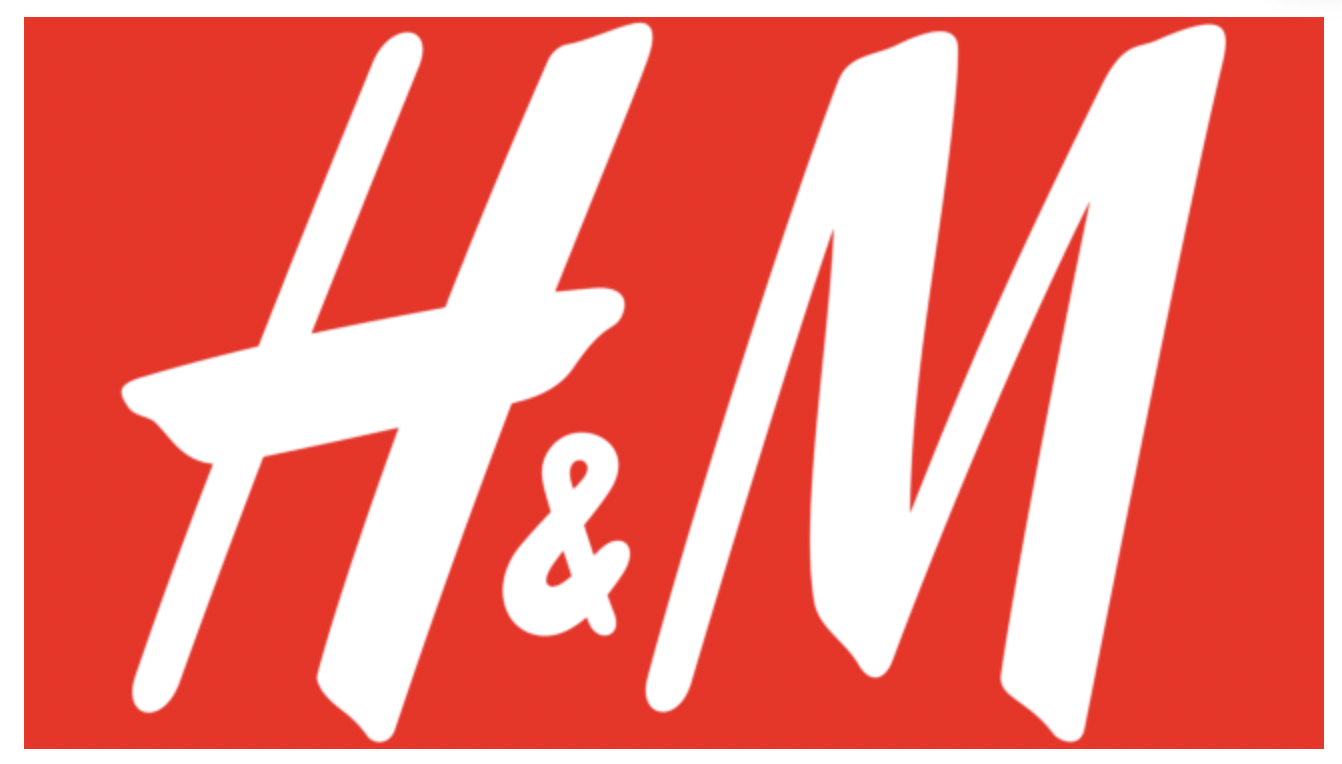

**Introduction**

H & M Hennes & Mauritz AB (H&M) is a Swedish multinational fast-fashion clothing company headquartered in Stockholm, founded in 1947. Its focus is not only clothing and accesories for men, women, teenagers, and children. But also home decoration and cosmetics is part of this big company .H&M operates in 74 countries with over 5,000 stores.



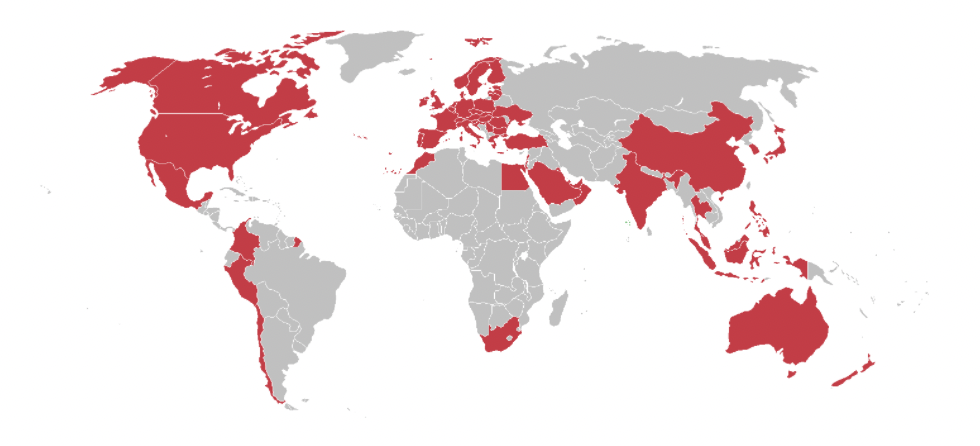

**Objective**

H&M has customers that belong to the group of fashionable and trendy, who see shopping as a social activity providing pleasure in their daily life. They want to follow trends without investing a lot of money. The most of them are younger people. Even though H&M offers clothing and accessories for all ages, their target market is women and they usually shop more for them. They also buy all their children’s clothing and often their husbands as well. 

With their low prices H&M targets woman in the lower middle class and working class, this is a concentrated targeting strategy. Because their focus is to sell a fashionable product for a low price they target married to single woman, mothers and daughters. Many single young women who always want to stay on top of the fashion trends are constantly upgrading their closets with H&Ms new affordable items. 

In this project we will see that consumers are not highly brand loyal and that there's a gap between the sales per age.

The objective of this project is to analyse the data and understand more about the customer behaviour, make a business inteligence study, providing solutions and sugestions for the brand, specially focusing on the target that has potential to buy more in the stores: women between 35-46 years old. 


**Datasets**

We will analise 3 relevant databases from H&M finded in internet: the first is about the articles(products) provided by the company, the second with informations about the customers and the third is about the transactions, with values and quantities. 


### 1. Articles database:


This database contains information about the product stock of H&M shops. Atention: the number of this data are not referred to the transactions, but the units of each article. We will have information about the transactions in a different database.

In [186]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sns
import statsmodels.api as sm
from scipy.stats import boxcox
import matplotlib.ticker as mtick
from itertools import permutations,combinations
from collections import Counter
import os
import gc
import time
import random
import math
import glob
from scipy import spatial
from tqdm import tqdm
import warnings
import pandas as pd
import numpy as np
from numpy import dot, sqrt
import seaborn as sns
import matplotlib as mpl
import matplotlib.patches as patches
import matplotlib.pyplot as plt
import matplotlib.image as mpimg
from matplotlib.offsetbox import AnnotationBbox, OffsetImage
from IPython.display import display_html

from PIL import Image
plt.rcParams.update({'font.size': 16})

from IPython.core.interactiveshell import InteractiveShell
InteractiveShell.ast_node_interactivity = "all"

pd.options.display.max_rows = 100




In [2]:
articles = pd.read_csv ('articles.csv')
articles

,article_id,product_code,prod_name,product_type_no,product_type_name,product_group_name,graphical_appearance_no,graphical_appearance_name,colour_group_code,colour_group_name,...,department_name,index_code,index_name,index_group_no,index_group_name,section_no,section_name,garment_group_no,garment_group_name,detail_desc
0,108775015,108775,Strap top,253,Vest top,Garment Upper body,1010016,Solid,9,Black,...,Jersey Basic,A,Ladieswear,1,Ladieswear,16,Womens Everyday Basics,1002,Jersey Basic,Jersey top with narrow shoulder straps.
1,108775044,108775,Strap top,253,Vest top,Garment Upper body,1010016,Solid,10,White,...,Jersey Basic,A,Ladieswear,1,Ladieswear,16,Womens Everyday Basics,1002,Jersey Basic,Jersey top with narrow shoulder straps.
2,108775051,108775,Strap top (1),253,Vest top,Garment Upper body,1010017,Stripe,11,Off White,...,Jersey Basic,A,Ladieswear,1,Ladieswear,16,Womens Everyday Basics,1002,Jersey Basic,Jersey top with narrow shoulder straps.
3,110065001,110065,OP T-shirt (Idro),306,Bra,Underwear,1010016,Solid,9,Black,...,Clean Lingerie,B,Lingeries/Tights,1,Ladieswear,61,Womens Lingerie,1017,"Under-, Nightwear","Microfibre T-shirt bra with underwired, moulde..."
4,110065002,110065,OP T-shirt (Idro),306,Bra,Underwear,1010016,Solid,10,White,...,Clean Lingerie,B,Lingeries/Tights,1,Ladieswear,61,Womens Lingerie,1017,"Under-, Nightwear","Microfibre T-shirt bra with underwired, moulde..."
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
105537,953450001,953450,5pk regular Placement1,302,Socks,Socks & Tights,1010014,Placement print,9,Black,...,Socks Bin,F,Menswear,3,Menswear,26,Men Underwear,1021,Socks and Tights,Socks in a fine-knit cotton blend with a small...
105538,953763001,953763,SPORT Malaga tank,253,Vest top,Garment Upper body,1010016,Solid,9,Black,...,Jersey,A,Ladieswear,1,Ladieswear,2,H&M+,1005,Jersey Fancy,Loose-fitting sports vest top in ribbed fast-d...
105539,956217002,956217,Cartwheel dress,265,Dress,Garment Full body,1010016,Solid,9,Black,...,Jersey,A,Ladieswear,1,Ladieswear,18,Womens Trend,1005,Jersey Fancy,"Short, A-line dress in jersey with a round nec..."
105540,957375001,957375,CLAIRE HAIR CLAW,72,Hair clip,Accessories,1010016,Solid,9,Black,...,Small Accessories,D,Divided,2,Divided,52,Divided Accessories,1019,Accessories,Large plastic hair claw.


In [3]:
articles.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 105542 entries, 0 to 105541
Data columns (total 25 columns):
 #   Column                        Non-Null Count   Dtype 
---  ------                        --------------   ----- 
 0   article_id                    105542 non-null  int64 
 1   product_code                  105542 non-null  int64 
 2   prod_name                     105542 non-null  object
 3   product_type_no               105542 non-null  int64 
 4   product_type_name             105542 non-null  object
 5   product_group_name            105542 non-null  object
 6   graphical_appearance_no       105542 non-null  int64 
 7   graphical_appearance_name     105542 non-null  object
 8   colour_group_code             105542 non-null  int64 
 9   colour_group_name             105542 non-null  object
 10  perceived_colour_value_id     105542 non-null  int64 
 11  perceived_colour_value_name   105542 non-null  object
 12  perceived_colour_master_id    105542 non-null  int64 
 13 

#### Key figures:

- 105.542 rows in the dataset
- 25 features in the dataset
- 14 of text columns in the dataset
- 11 numeric columns in the dataset
    

Unique indentifier of an article:

- article_id (int64) - an unique 9-digit identifier of the article, 105 542 unique values (as the length of the database)

5 product related columns:

- product_code (int64) - 6-digit product code (the first 6 digits of article_id, 47 224 unique values
- prod_name (object) - name of a product, 45 875 unique values
- product_type_no (int64) - product type number, 131 unique values
- product_type_name (object) - name of a product type, equivalent of product_type_no
- product_group_name (object) - name of a product group, in total 19 groups

2 columns related to the pattern:

- graphical_appearance_no (int64) - code of a pattern, 30 unique values
- graphical_appearance_name (object) - name of a pattern, 30 unique values

2 columns related to the color:

- colour_group_code (int64) - code of a color, 50 unique values
- colour_group_name (object) - name of a color, 50 unique values

4 columns related to perceived colour (general tone):

- perceived_colour_value_id - perceived color id, 8 unique values
- perceived_colour_value_name - perceived color name, 8 unique values
- perceived_colour_master_id - perceived master color id, 20 unique values
- perceived_colour_master_name - perceived master color name, 20 unique values

2 columns related to the department:

- department_no - department number, 299 unique values
- department_name - department name, 299 unique values

4 columns related to the index, which is actually a top-level category:

- index_code - index code, 10 unique values
- index_name - index name, 10 unique values
- index_group_no - index group code, 5 unique values
- index_group_name - index group code, 5 unique values

2 columns related to the section:

- section_no - section number, 56 unique values
- section_name - section name, 56 unique values

2 columns related to the garment group:

- garment_group_n - section number, 56 unique values
- garment_group_name - section name, 56 unique values

1 column with a detailed description of the article:

- detail_desc - 43 404 unique values


**Checking the missing values**

Only one column - detail desc - has missing values but this is a very small fraction of the dataset - about 0.39% (checking the sum, there are only 416 rows with missing values).

In [4]:
articles.isna().sum()/len(articles)*100

article_id                      0.000000
product_code                    0.000000
prod_name                       0.000000
product_type_no                 0.000000
product_type_name               0.000000
product_group_name              0.000000
graphical_appearance_no         0.000000
graphical_appearance_name       0.000000
colour_group_code               0.000000
colour_group_name               0.000000
perceived_colour_value_id       0.000000
perceived_colour_value_name     0.000000
perceived_colour_master_id      0.000000
perceived_colour_master_name    0.000000
department_no                   0.000000
department_name                 0.000000
index_code                      0.000000
index_name                      0.000000
index_group_no                  0.000000
index_group_name                0.000000
section_no                      0.000000
section_name                    0.000000
garment_group_no                0.000000
garment_group_name              0.000000
detail_desc     

In [5]:
articles.isna().sum()

article_id                        0
product_code                      0
prod_name                         0
product_type_no                   0
product_type_name                 0
product_group_name                0
graphical_appearance_no           0
graphical_appearance_name         0
colour_group_code                 0
colour_group_name                 0
perceived_colour_value_id         0
perceived_colour_value_name       0
perceived_colour_master_id        0
perceived_colour_master_name      0
department_no                     0
department_name                   0
index_code                        0
index_name                        0
index_group_no                    0
index_group_name                  0
section_no                        0
section_name                      0
garment_group_no                  0
garment_group_name                0
detail_desc                     416
dtype: int64

There are no duplicated rows.

In [6]:
articles.duplicated().sum()

0

#### Analysis:

We explore what is inside the column "departent_name" to figure out which are the department that have more amount of articles. Those are: "Jersey", "Knitwear" and "Trouser"

In [138]:
department = articles['department_name'].value_counts()
department

Jersey                             4604
Knitwear                           3503
Trouser                            2655
Blouse                             2362
Dress                              2087
                                   ... 
Woven bottoms inactive from S.7       1
Jersey inactive from S.6              1
EQ Divided Blue                       1
Accessories Other                     1
Kids Boy License                      1
Name: department_name, Length: 250, dtype: int64

Here we can see that "Jersey Fancy", "Accessories" and "Jersey Basic" are the most repited values in this column. We can see that two of them coincides with the most repited in the column "department name": "Jersey"

In [8]:
department = articles['garment_group_name'].value_counts()
department

Jersey Fancy                     21445
Accessories                      11519
Jersey Basic                      8126
Knitwear                          7490
Under-, Nightwear                 7441
Trousers                          6727
Blouses                           5838
Shoes                             5145
Dresses Ladies                    4874
Outdoor                           4501
Unknown                           3873
Trousers Denim                    3100
Swimwear                          2787
Socks and Tights                  2272
Shirts                            2116
Woven/Jersey/Knitted mix Baby     1965
Shorts                            1559
Dresses/Skirts girls              1541
Skirts                            1254
Special Offers                    1061
Dressed                            908
Name: garment_group_name, dtype: int64

In [9]:
import matplotlib.ticker as mtick

def plot_bar(database, col, figsize=(13,5), pct=False, label='articles'):
    fig, ax = plt.subplots(figsize=figsize, facecolor='#f6f6f6')
    for loc in ['bottom', 'left']:
        ax.spines[loc].set_visible(True)
        ax.spines[loc].set_linewidth(2)
        ax.spines[loc].set_color('black')
    ax.spines['right'].set_visible(False)
    ax.spines['top'].set_visible(False)
    
    if pct:
        data = database[col].value_counts()
        data = data.div(data.sum()).mul(100)
        data = data.reset_index()
        ax = sns.barplot(data=data, x=col, y='index', color='#2693d7', lw=1.5, ec='black', zorder=2)
        ax.set_xlabel('% of ' + label, fontsize=10, weight='bold')
        ax.xaxis.set_major_formatter(mtick.PercentFormatter())
    else:
        data = database[col].value_counts().reset_index()
        ax = sns.barplot(data=data, x=col, y='index', color='#2693d7', lw=1.5, ec='black', zorder=2)        
        ax.set_xlabel('# of articles' + label)
        
    ax.grid(zorder=0)
    ax.text(0, -0.75, col, color='black', fontsize=10, ha='left', va='bottom', weight='bold', style='italic')
    ax.set_ylabel('')
        
    plt.show();

Here we can apreciate that "Ladieswear", "Babies/Children" and "Divided" are the group of articles that are dominant in this dataframe. The smallest amount of articles is in Sport group.

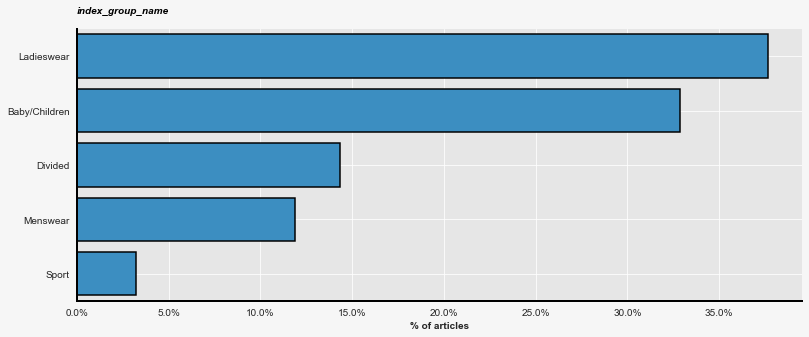

In [10]:
sns.set_style("darkgrid", {"axes.facecolor": ".9"})
plot_bar(articles, 'index_group_name', pct=True)

In [11]:
group = articles['index_group_name'].value_counts()
group

Ladieswear       39737
Baby/Children    34711
Divided          15149
Menswear         12553
Sport             3392
Name: index_group_name, dtype: int64

In this bar plot we can see the index name. In the first position we can see Ladieswear, followed by Divided and Menswear. There are 4 index names dedicated for Children/ Babys, so still we can say that there is a big amount of articles dedicated for this group as we saw in the "index_group_name"

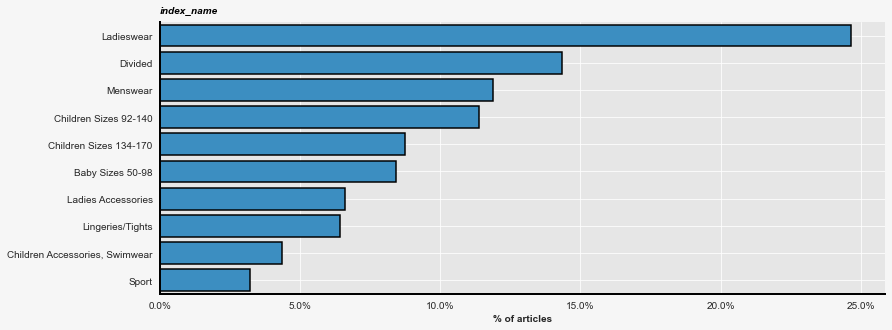

In [12]:

plot_bar(articles, 'index_name', pct=True)

To understand better about the index_name "Divided", we filtered only the rows that are in this category. After a research in the H&M website we could confirm that "Divided" is the line of clothes made for teenagers.

In [13]:
divided = articles[articles['index_name']=='Divided']
divided[['prod_name','product_type_name','detail_desc','index_name','section_name','garment_group_name']].drop_duplicates().head(12)

,prod_name,product_type_name,detail_desc,index_name,section_name,garment_group_name
78,Sigge sneaker sock 5p,Socks,Fine-knit trainer socks in various colours.,Divided,Divided Basics,"Under-, Nightwear"
124,Eva chelsea boot,Boots,Chelsea boots with elasticated gores in the si...,Divided,Divided Accessories,Shoes
125,Jenny 5-pack,Socks,Fine-knit socks.,Divided,Divided Basics,"Under-, Nightwear"
149,Lena over knee.,Socks,Fine-knit over-the-knee socks.,Divided,Divided Basics,"Under-, Nightwear"
175,Tina leggings,Leggings/Tights,Leggings in extra sturdy jersey with an elasti...,Divided,Divided Basics,Jersey Basic
176,Heavy jsy long leg,Leggings/Tights,Leggings in extra sturdy jersey with an elasti...,Divided,Divided Basics,Jersey Basic
186,Jodi skirt,Skirt,"Short, bell-shaped skirt in stretch jersey wit...",Divided,Divided Basics,Jersey Basic
187,Long Leg Leggings,Leggings/Tights,Leggings in stretch jersey with an elasticated...,Divided,Divided Basics,Jersey Basic
189,Raven skirt,Skirt,Short jersey skirt with an elasticated waist.,Divided,Divided Basics,Jersey Basic
193,Carolina sweater (1),Sweater,Long-sleeved top in sweatshirt fabric with rib...,Divided,Divided Basics,Jersey Basic


We see now also that index is a sub-category of index_group. We can create now a multi-index fram with groupings to see the counts:

In [14]:
articles.groupby(['index_group_name', 'index_name']).size()

index_group_name  index_name                    
Baby/Children     Baby Sizes 50-98                   8875
                  Children Accessories, Swimwear     4615
                  Children Sizes 134-170             9214
                  Children Sizes 92-140             12007
Divided           Divided                           15149
Ladieswear        Ladies Accessories                 6961
                  Ladieswear                        26001
                  Lingeries/Tights                   6775
Menswear          Menswear                          12553
Sport             Sport                              3392
dtype: int64

Even finer category is product_group_name. Let's see what is it's structure and articles counts.

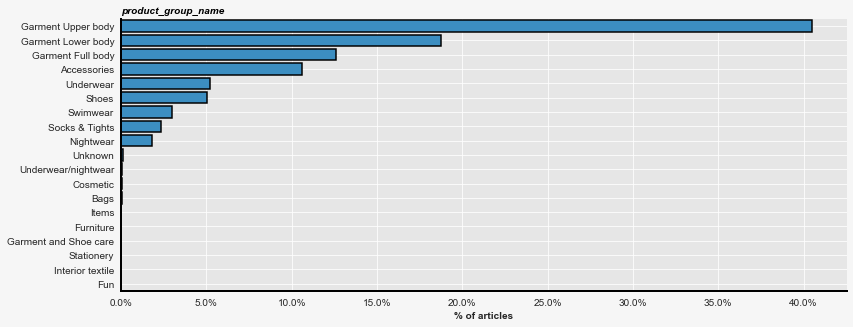

In [15]:
plot_bar(articles, 'product_group_name', pct=True)

The barchart above shows that most of articles lays in only few groups. Let's see the cumulative sum.

In [17]:
data = articles['product_group_name'].value_counts()
data = data.div(data.sum()).mul(100)
data

Garment Upper body       40.496674
Garment Lower body       18.771674
Garment Full body        12.594038
Accessories              10.572095
Underwear                 5.201721
Shoes                     5.005590
Swimwear                  2.962802
Socks & Tights            2.313771
Nightwear                 1.799284
Unknown                   0.114646
Underwear/nightwear       0.051164
Cosmetic                  0.046427
Bags                      0.023687
Items                     0.016107
Furniture                 0.012317
Garment and Shoe care     0.008527
Stationery                0.004737
Interior textile          0.002842
Fun                       0.001895
Name: product_group_name, dtype: float64

In this barplot we can see which are the colors that are more predominant in the articles. The black colour is significantly more domimant than the rest of the colors. 

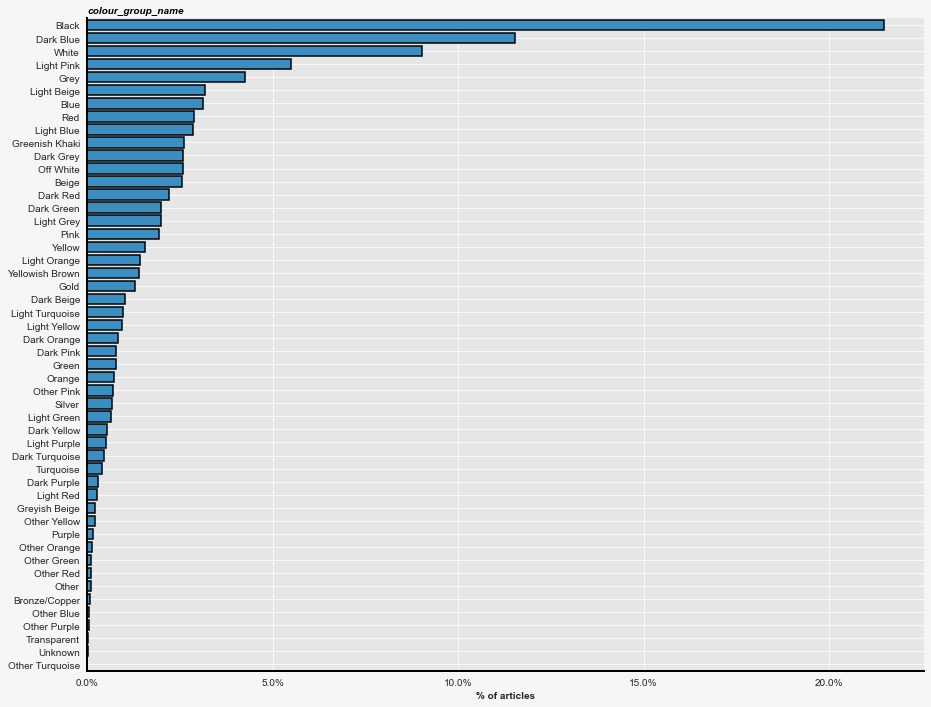

In [18]:
plot_bar(articles, 'colour_group_name', figsize=(15,12), pct=True)

We thought it was interesting to show this barplot of the perception of the colors to see which are the type of colours that are more present in the articles.

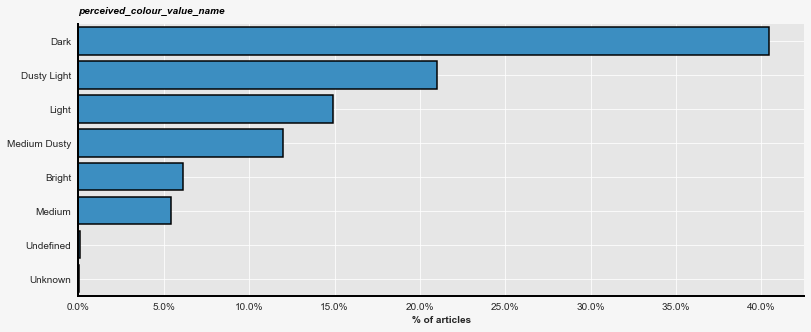

In [19]:
plot_bar(articles, 'perceived_colour_value_name', pct=True)

#### Cleaning:

Now we will drop some columns that will be not relevant for our future analysis.

In [20]:
print(articles.columns)

Index(['article_id', 'product_code', 'prod_name', 'product_type_no',
       'product_type_name', 'product_group_name', 'graphical_appearance_no',
       'graphical_appearance_name', 'colour_group_code', 'colour_group_name',
       'perceived_colour_value_id', 'perceived_colour_value_name',
       'perceived_colour_master_id', 'perceived_colour_master_name',
       'department_no', 'department_name', 'index_code', 'index_name',
       'index_group_no', 'index_group_name', 'section_no', 'section_name',
       'garment_group_no', 'garment_group_name', 'detail_desc'],
      dtype='object')


In [21]:
def drop_columns(articles):
    articles.drop(columns=['product_type_no','graphical_appearance_no','colour_group_code','index_code','index_group_no','section_no','garment_group_no', 'department_no','perceived_colour_master_id','perceived_colour_value_id'], inplace=True)
    return articles

In [22]:
drop_columns(articles)

,article_id,product_code,prod_name,product_type_name,product_group_name,graphical_appearance_name,colour_group_name,perceived_colour_value_name,perceived_colour_master_name,department_name,index_name,index_group_name,section_name,garment_group_name,detail_desc
0,108775015,108775,Strap top,Vest top,Garment Upper body,Solid,Black,Dark,Black,Jersey Basic,Ladieswear,Ladieswear,Womens Everyday Basics,Jersey Basic,Jersey top with narrow shoulder straps.
1,108775044,108775,Strap top,Vest top,Garment Upper body,Solid,White,Light,White,Jersey Basic,Ladieswear,Ladieswear,Womens Everyday Basics,Jersey Basic,Jersey top with narrow shoulder straps.
2,108775051,108775,Strap top (1),Vest top,Garment Upper body,Stripe,Off White,Dusty Light,White,Jersey Basic,Ladieswear,Ladieswear,Womens Everyday Basics,Jersey Basic,Jersey top with narrow shoulder straps.
3,110065001,110065,OP T-shirt (Idro),Bra,Underwear,Solid,Black,Dark,Black,Clean Lingerie,Lingeries/Tights,Ladieswear,Womens Lingerie,"Under-, Nightwear","Microfibre T-shirt bra with underwired, moulde..."
4,110065002,110065,OP T-shirt (Idro),Bra,Underwear,Solid,White,Light,White,Clean Lingerie,Lingeries/Tights,Ladieswear,Womens Lingerie,"Under-, Nightwear","Microfibre T-shirt bra with underwired, moulde..."
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
105537,953450001,953450,5pk regular Placement1,Socks,Socks & Tights,Placement print,Black,Dark,Black,Socks Bin,Menswear,Menswear,Men Underwear,Socks and Tights,Socks in a fine-knit cotton blend with a small...
105538,953763001,953763,SPORT Malaga tank,Vest top,Garment Upper body,Solid,Black,Dark,Black,Jersey,Ladieswear,Ladieswear,H&M+,Jersey Fancy,Loose-fitting sports vest top in ribbed fast-d...
105539,956217002,956217,Cartwheel dress,Dress,Garment Full body,Solid,Black,Dark,Black,Jersey,Ladieswear,Ladieswear,Womens Trend,Jersey Fancy,"Short, A-line dress in jersey with a round nec..."
105540,957375001,957375,CLAIRE HAIR CLAW,Hair clip,Accessories,Solid,Black,Dark,Black,Small Accessories,Divided,Divided,Divided Accessories,Accessories,Large plastic hair claw.


### 2. Customer database:


Here we find some information about the customers of H&M. This kind of data allows the company to tune their recomender system. This data contains information which can be treated as 'static' or slowly-changing. Usually the companies collect features like sex, age, address, etc. However, in this dataframe we will not find information about the gender of the customers, as we see below:

In [23]:
customers = pd.read_csv ('customers.csv')
customers

,customer_id,FN,Active,club_member_status,fashion_news_frequency,age,postal_code
0,00000dbacae5abe5e23885899a1fa44253a17956c6d1c3...,NaN,NaN,ACTIVE,NONE,49.0,52043ee2162cf5aa7ee79974281641c6f11a68d276429a...
1,0000423b00ade91418cceaf3b26c6af3dd342b51fd051e...,NaN,NaN,ACTIVE,NONE,25.0,2973abc54daa8a5f8ccfe9362140c63247c5eee03f1d93...
2,000058a12d5b43e67d225668fa1f8d618c13dc232df0ca...,NaN,NaN,ACTIVE,NONE,24.0,64f17e6a330a85798e4998f62d0930d14db8db1c054af6...
3,00005ca1c9ed5f5146b52ac8639a40ca9d57aeff4d1bd2...,NaN,NaN,ACTIVE,NONE,54.0,5d36574f52495e81f019b680c843c443bd343d5ca5b1c2...
4,00006413d8573cd20ed7128e53b7b13819fe5cfc2d801f...,1.0,1.0,ACTIVE,Regularly,52.0,25fa5ddee9aac01b35208d01736e57942317d756b32ddd...
...,...,...,...,...,...,...,...
1371975,ffffbbf78b6eaac697a8a5dfbfd2bfa8113ee5b403e474...,NaN,NaN,ACTIVE,NONE,24.0,7aa399f7e669990daba2d92c577b52237380662f36480b...
1371976,ffffcd5046a6143d29a04fb8c424ce494a76e5cdf4fab5...,NaN,NaN,ACTIVE,NONE,21.0,3f47f1279beb72215f4de557d950e0bfa73789d24acb5e...
1371977,ffffcf35913a0bee60e8741cb2b4e78b8a98ee5ff2e6a1...,1.0,1.0,ACTIVE,Regularly,21.0,4563fc79215672cd6a863f2b4bf56b8f898f2d96ed590e...
1371978,ffffd7744cebcf3aca44ae7049d2a94b87074c3d4ffe38...,1.0,1.0,ACTIVE,Regularly,18.0,8892c18e9bc3dca6aa4000cb8094fc4b51ee8db2ed14d7...


In [24]:
customers.columns

Index(['customer_id', 'FN', 'Active', 'club_member_status',
       'fashion_news_frequency', 'age', 'postal_code'],
      dtype='object')

In [25]:
customers.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1371980 entries, 0 to 1371979
Data columns (total 7 columns):
 #   Column                  Non-Null Count    Dtype  
---  ------                  --------------    -----  
 0   customer_id             1371980 non-null  object 
 1   FN                      476930 non-null   float64
 2   Active                  464404 non-null   float64
 3   club_member_status      1365918 non-null  object 
 4   fashion_news_frequency  1355971 non-null  object 
 5   age                     1356119 non-null  float64
 6   postal_code             1371980 non-null  object 
dtypes: float64(3), object(4)
memory usage: 73.3+ MB


#### Key figures:

- 1.371.980 rows in the dataset
- 7 features in the dataset
- 4 of text columns in the dataset
- 3 numeric columns in the dataset
    

Unique indentifier of a customer:

- customer_id - an unique identifier of the customer

6 customer related columns:

- FN - binary feature (1 or NaN)
- Active - binary feature (1 or NaN)
- club_member_status - status in a club, 3 unique values
- fashion_news_frequency - frequency of sending communication to the customer, 4 unique values
- age - age of the customer
- postal_code - postal code (anonimized), 352 899 unique values

#### Cleaning:

Only customer id and postal code are completely filled. Age, fashion news frequency have around 1% misssing data, FN has 65% missing and Active has 66% missing data.

In [26]:
def missing_data(customer):
    total = customer.isnull().sum().sort_values(ascending = False)
    percent = (customer.isnull().sum()/customer.isnull().count()*100).sort_values(ascending = False)
    return pd.concat([total, percent], axis=1, keys=['Total', 'Percent'])

In [27]:
missing_data(customers)

,Total,Percent
Active,907576,66.150819
FN,895050,65.237831
fashion_news_frequency,16009,1.166854
age,15861,1.156066
club_member_status,6062,0.441843
customer_id,0,0.000000
postal_code,0,0.000000


To enable our future analyses, we will replace the missing values in the "Age" column with the median number of these values.

In [132]:
customers_backup = customers.copy()
customers[['age']] = customers[['age']].fillna(median)
customers

,customer_id,FN,Active,club_member_status,age
0,00000dbacae5abe5e23885899a1fa44253a17956c6d1c3...,0.0,0.0,ACTIVE,49.0
1,0000423b00ade91418cceaf3b26c6af3dd342b51fd051e...,0.0,0.0,ACTIVE,25.0
2,000058a12d5b43e67d225668fa1f8d618c13dc232df0ca...,0.0,0.0,ACTIVE,24.0
3,00005ca1c9ed5f5146b52ac8639a40ca9d57aeff4d1bd2...,0.0,0.0,ACTIVE,54.0
4,00006413d8573cd20ed7128e53b7b13819fe5cfc2d801f...,1.0,1.0,ACTIVE,52.0
...,...,...,...,...,...
1371975,ffffbbf78b6eaac697a8a5dfbfd2bfa8113ee5b403e474...,0.0,0.0,ACTIVE,24.0
1371976,ffffcd5046a6143d29a04fb8c424ce494a76e5cdf4fab5...,0.0,0.0,ACTIVE,21.0
1371977,ffffcf35913a0bee60e8741cb2b4e78b8a98ee5ff2e6a1...,1.0,1.0,ACTIVE,21.0
1371978,ffffd7744cebcf3aca44ae7049d2a94b87074c3d4ffe38...,1.0,1.0,ACTIVE,18.0


The column "Postal code" is not in clear, it is coded, same as customer id. Therefore, we will remove this column, as we will not use it for our analysis.




In [28]:
def drop_columns(customers):
    customers.drop(columns=["postal_code"], inplace=True)
    return customers

In [29]:
drop_columns(customers)

,customer_id,FN,Active,club_member_status,fashion_news_frequency,age
0,00000dbacae5abe5e23885899a1fa44253a17956c6d1c3...,NaN,NaN,ACTIVE,NONE,49.0
1,0000423b00ade91418cceaf3b26c6af3dd342b51fd051e...,NaN,NaN,ACTIVE,NONE,25.0
2,000058a12d5b43e67d225668fa1f8d618c13dc232df0ca...,NaN,NaN,ACTIVE,NONE,24.0
3,00005ca1c9ed5f5146b52ac8639a40ca9d57aeff4d1bd2...,NaN,NaN,ACTIVE,NONE,54.0
4,00006413d8573cd20ed7128e53b7b13819fe5cfc2d801f...,1.0,1.0,ACTIVE,Regularly,52.0
...,...,...,...,...,...,...
1371975,ffffbbf78b6eaac697a8a5dfbfd2bfa8113ee5b403e474...,NaN,NaN,ACTIVE,NONE,24.0
1371976,ffffcd5046a6143d29a04fb8c424ce494a76e5cdf4fab5...,NaN,NaN,ACTIVE,NONE,21.0
1371977,ffffcf35913a0bee60e8741cb2b4e78b8a98ee5ff2e6a1...,1.0,1.0,ACTIVE,Regularly,21.0
1371978,ffffd7744cebcf3aca44ae7049d2a94b87074c3d4ffe38...,1.0,1.0,ACTIVE,Regularly,18.0


#### Analysis:

To better understand the nature of the data, we will surch for a relation between the two columns "FN" (that we assume are the initials for "Fashion News") and "fashion_news_frequency" and possibly identify some relevant information about both features. Here we'll replace NaN (missing values) for columns FN and Active with 0.

In [30]:
customers_backup = customers.copy()
customers[['FN','Active']] = customers[['FN','Active']].fillna(0)
customers

,customer_id,FN,Active,club_member_status,fashion_news_frequency,age
0,00000dbacae5abe5e23885899a1fa44253a17956c6d1c3...,0.0,0.0,ACTIVE,NONE,49.0
1,0000423b00ade91418cceaf3b26c6af3dd342b51fd051e...,0.0,0.0,ACTIVE,NONE,25.0
2,000058a12d5b43e67d225668fa1f8d618c13dc232df0ca...,0.0,0.0,ACTIVE,NONE,24.0
3,00005ca1c9ed5f5146b52ac8639a40ca9d57aeff4d1bd2...,0.0,0.0,ACTIVE,NONE,54.0
4,00006413d8573cd20ed7128e53b7b13819fe5cfc2d801f...,1.0,1.0,ACTIVE,Regularly,52.0
...,...,...,...,...,...,...
1371975,ffffbbf78b6eaac697a8a5dfbfd2bfa8113ee5b403e474...,0.0,0.0,ACTIVE,NONE,24.0
1371976,ffffcd5046a6143d29a04fb8c424ce494a76e5cdf4fab5...,0.0,0.0,ACTIVE,NONE,21.0
1371977,ffffcf35913a0bee60e8741cb2b4e78b8a98ee5ff2e6a1...,1.0,1.0,ACTIVE,Regularly,21.0
1371978,ffffd7744cebcf3aca44ae7049d2a94b87074c3d4ffe38...,1.0,1.0,ACTIVE,Regularly,18.0


Now we can see that the number of unique values of 0.0 in the "FN" column are closed to the number of "None" in "Fashion News Frequency". The value of 1.0 in "FN" is, in turn, similar to "Regularly" in "Fashion News Frequency".

In [31]:
FN = customers['FN'].value_counts()
FN

0.0    895050
1.0    476930
Name: FN, dtype: int64

In [32]:
FN_freq = customers['fashion_news_frequency'].value_counts()
FN_freq


NONE         877711
Regularly    477416
Monthly         842
None              2
Name: fashion_news_frequency, dtype: int64

We can confirm the relationship between these values in the spreadsheet below, which shows that the values of "None" in "Fashion News Frequency" column are mostly related to item 0.0 of the column "FN". The values of "Regularly" in "Fashion News Frequency" are related to 1.0 in "FN". But there's a small percentage of the people that receive fashion news regularly and are in the item 0.0 of the "FN" column.

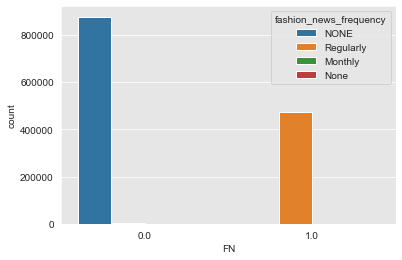

In [33]:
sns.countplot(x='FN', hue='fashion_news_frequency', data=customers)
plt.show();

Since the data of FN and Fashion News Frequency appears to be redundant for our analyses, we droped the "Fashion News Frequency" column.

In [34]:
def drop_fashion_news(customers):
    customers.drop(columns=['fashion_news_frequency'], inplace=True)
    return customers

In [35]:
drop_fashion_news(customers)

,customer_id,FN,Active,club_member_status,age
0,00000dbacae5abe5e23885899a1fa44253a17956c6d1c3...,0.0,0.0,ACTIVE,49.0
1,0000423b00ade91418cceaf3b26c6af3dd342b51fd051e...,0.0,0.0,ACTIVE,25.0
2,000058a12d5b43e67d225668fa1f8d618c13dc232df0ca...,0.0,0.0,ACTIVE,24.0
3,00005ca1c9ed5f5146b52ac8639a40ca9d57aeff4d1bd2...,0.0,0.0,ACTIVE,54.0
4,00006413d8573cd20ed7128e53b7b13819fe5cfc2d801f...,1.0,1.0,ACTIVE,52.0
...,...,...,...,...,...
1371975,ffffbbf78b6eaac697a8a5dfbfd2bfa8113ee5b403e474...,0.0,0.0,ACTIVE,24.0
1371976,ffffcd5046a6143d29a04fb8c424ce494a76e5cdf4fab5...,0.0,0.0,ACTIVE,21.0
1371977,ffffcf35913a0bee60e8741cb2b4e78b8a98ee5ff2e6a1...,1.0,1.0,ACTIVE,21.0
1371978,ffffd7744cebcf3aca44ae7049d2a94b87074c3d4ffe38...,1.0,1.0,ACTIVE,18.0


We also compared the two columns "Active" and "Club Member Status" to see if the data was redundant, but actualy the Active members in "Club Member Status" are also in the Not-Active label of "Active" column.

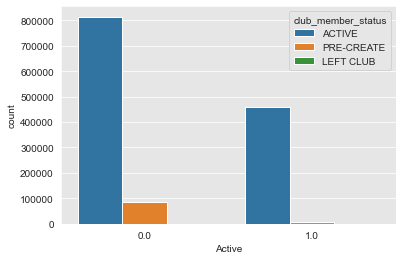

In [36]:
sns.countplot(x='Active', hue='club_member_status', data=customers)
plt.show();

Interesting information is that just a small percentage of the costumers have left the Club Member Status, after creating a profile:

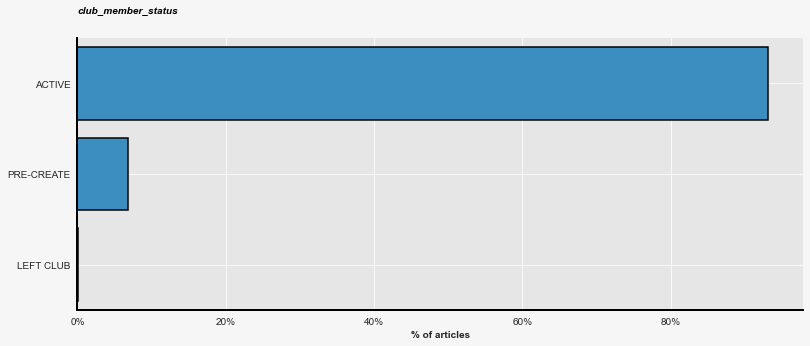

In [134]:
plot_bar(customers, 'club_member_status', pct=True)

We can also see some relation between the column "FN" and "Active".

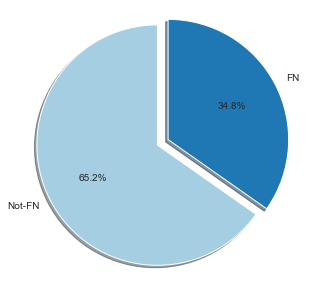

In [37]:
fig, ax = plt.subplots(figsize=(5,5))
explode = (0, 0.1)
colors = sns.color_palette('Paired')
ax.pie(customers['FN'].value_counts(), explode=explode, labels=['Not-FN','FN'],
       autopct='%1.1f%%',shadow=True, startangle=90, colors=colors)
ax.axis('equal')
plt.show();

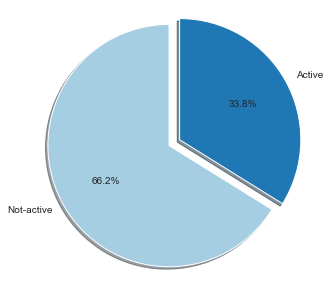

In [38]:
fig, ax = plt.subplots(figsize=(5,5))
explode = (0, 0.1)
colors = sns.color_palette('Paired')
ax.pie(customers['Active'].value_counts(), explode=explode, labels=['Not-active','Active'],
       autopct='%1.1f%%',shadow=True, startangle=90, colors=colors)
ax.axis('equal')
plt.show();

Percentage of customers that have both FN and Active status: 33.85%. It look that all custmoers that are Active also receive Fashion News. But reverse is not true: as we can see in the chart below a small percentage of the users in the FN status are not active:

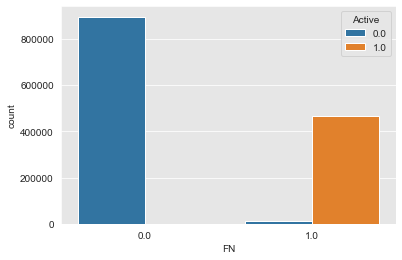

In [39]:
sns.countplot(x='FN', hue='Active', data=customers)
plt.show();

The distribution below shows that there are two main age-groups of customers: around 20-30 years old and 45-55 years old. To our surprise, the audience between 35 and 45 consumes less than the younger and older public.

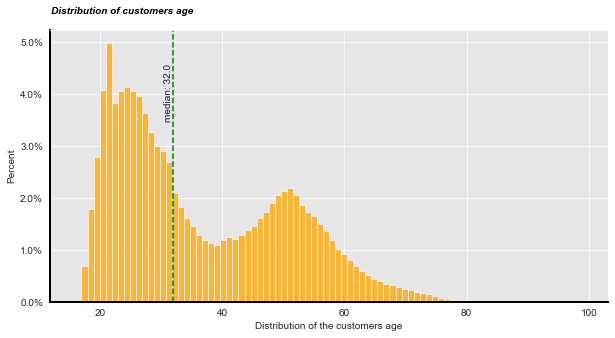

In [40]:
fig, ax = plt.subplots(figsize=(10,5))
ax = sns.histplot(data=customers, x='age', bins=customers['age'].nunique(), color='orange', stat="percent")
ax.set_xlabel('Distribution of the customers age')
for loc in ['bottom', 'left']:
    ax.spines[loc].set_visible(True)
    ax.spines[loc].set_linewidth(2)
    ax.spines[loc].set_color('black')
ax.yaxis.set_major_formatter(mtick.PercentFormatter())
median = customers['age'].median()
ax.axvline(x=median, color="green", ls="--")
ax.text(median, 3.5, 'median: {}'.format(round(median,1)), rotation='vertical', ha='right')
ax.text(12, 5.5, 'Distribution of customers age', color='black', fontsize=10, ha='left', va='bottom', weight='bold', style='italic')
plt.show();

The number of active customers on H&M's platform corresponds well to the sending of fashion news. 

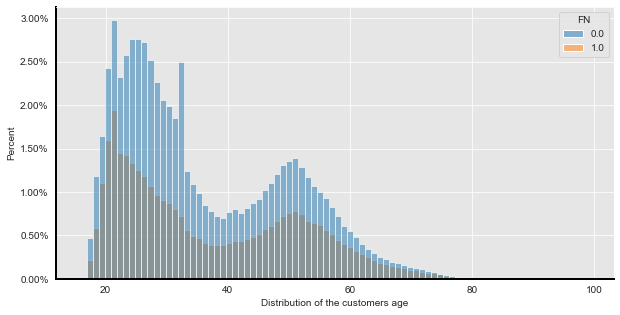

In [42]:
fig, ax = plt.subplots(figsize=(10,5))
ax = sns.histplot(data=customers, x='age', bins=customers['age'].nunique(), hue='FN', stat="percent")
ax.set_xlabel('Distribution of the customers age')
for loc in ['bottom', 'left']:
    ax.spines[loc].set_visible(True)
    ax.spines[loc].set_linewidth(2)
    ax.spines[loc].set_color('black')
ax.yaxis.set_major_formatter(mtick.PercentFormatter())
plt.show();

In summary, we were intrigued by the fact that an economically active public, such as the 35 to 46 years old, did not have a greater representation in these graphs. We will analyze this information further after cross-referencing the consumer and transaction data.

### 3. Transactions database:

In this trans dataframe we can see the transactions every day, during the period between September 2018 and September 2020.

In [45]:
transactions = pd.read_csv ('transactions_train.csv')
transactions

,t_dat,customer_id,article_id,price,sales_channel_id
0,2018-09-20,000058a12d5b43e67d225668fa1f8d618c13dc232df0ca...,663713001,0.050831,2
1,2018-09-20,000058a12d5b43e67d225668fa1f8d618c13dc232df0ca...,541518023,0.030492,2
2,2018-09-20,00007d2de826758b65a93dd24ce629ed66842531df6699...,505221004,0.015237,2
3,2018-09-20,00007d2de826758b65a93dd24ce629ed66842531df6699...,685687003,0.016932,2
4,2018-09-20,00007d2de826758b65a93dd24ce629ed66842531df6699...,685687004,0.016932,2
...,...,...,...,...,...
31788319,2020-09-22,fff2282977442e327b45d8c89afde25617d00124d0f999...,929511001,0.059305,2
31788320,2020-09-22,fff2282977442e327b45d8c89afde25617d00124d0f999...,891322004,0.042356,2
31788321,2020-09-22,fff380805474b287b05cb2a7507b9a013482f7dd0bce0e...,918325001,0.043203,1
31788322,2020-09-22,fff4d3a8b1f3b60af93e78c30a7cb4cf75edaf2590d3e5...,833459002,0.006763,1


In [46]:
transactions.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 31788324 entries, 0 to 31788323
Data columns (total 5 columns):
 #   Column            Dtype  
---  ------            -----  
 0   t_dat             object 
 1   customer_id       object 
 2   article_id        int64  
 3   price             float64
 4   sales_channel_id  int64  
dtypes: float64(1), int64(2), object(2)
memory usage: 1.2+ GB


In [47]:
transactions['t_dat'].max()

'2020-09-22'

In [48]:
transactions['t_dat'].min()

'2018-09-20'

#### Key figures:

- 31.788.324 rows in the dataset
- 5 features in the dataset
- 1 text column in the dataset
- 3 numeric columns in the dataset

Columns description:

- t_dat - date of a transaction in format YYYY-MM-DD but provided as a string
- customer_id - identifier of the customer which can be mapped to the customer_id column in the customers table
- article_id - identifier of the product which can be mapped to the article_id column in the articles table
- price - price paid (values are standardized)
- sales_channel_id - sales channel, 2 unique values

In [49]:
transactions.isna().sum()

t_dat               0
customer_id         0
article_id          0
price               0
sales_channel_id    0
dtype: int64

There are no missing data.

#### Analysis:

It's clear from the below graph that there's a lot o outliers in the prices. That's why we cutted the values above 0.1.

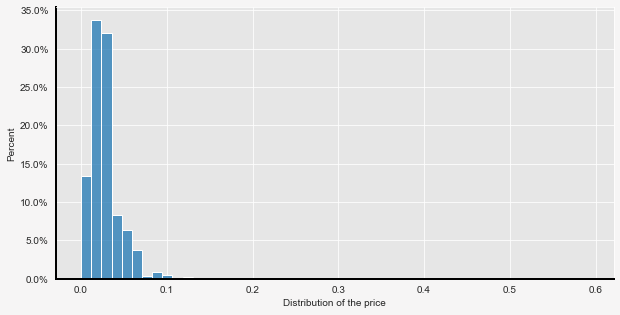

In [50]:
sns.set_style("darkgrid", {"axes.facecolor": ".9"})
fig, ax = plt.subplots(figsize=(10,5), facecolor='#f6f5f5')
ax = sns.histplot(data=transactions, x='price', bins=50, stat="percent")
ax.set_xlabel('Distribution of the price')
for loc in ['bottom', 'left']:
    ax.spines[loc].set_visible(True)
    ax.spines[loc].set_linewidth(2)
    ax.spines[loc].set_color('black')
ax.yaxis.set_major_formatter(mtick.PercentFormatter())
plt.show();

In the graphic below, without the outliers, we can see that the products with lower prices are the majority of the articles sold by the company

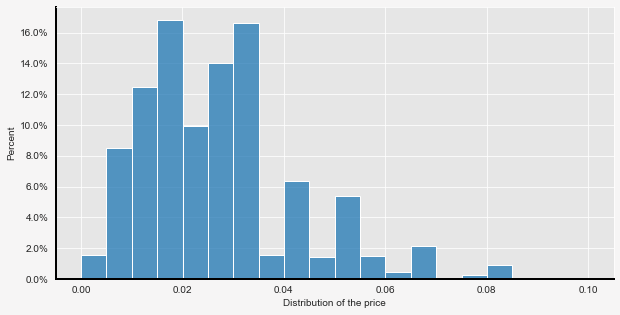

In [150]:
fig, ax = plt.subplots(figsize=(10,5), facecolor='#f6f5f5')
data = transactions[transactions['price']<0.1]
ax = sns.histplot(data=data, x='price', bins=20, stat="percent")
ax.set_xlabel('Distribution of the price')
for loc in ['bottom', 'left']:
    ax.spines[loc].set_visible(True)
    ax.spines[loc].set_linewidth(2)
    ax.spines[loc].set_color('black')
ax.yaxis.set_major_formatter(mtick.PercentFormatter())
plt.show();

In [53]:
transactions['t_dat'] = pd.to_datetime(transactions['t_dat'])
t_per_day = transactions.groupby('t_dat',as_index=False).count()

We can see that the number of transactions are higher at summer time, but we find a lot of outliers, specially before Christmas season and in the month of April (Spring time)

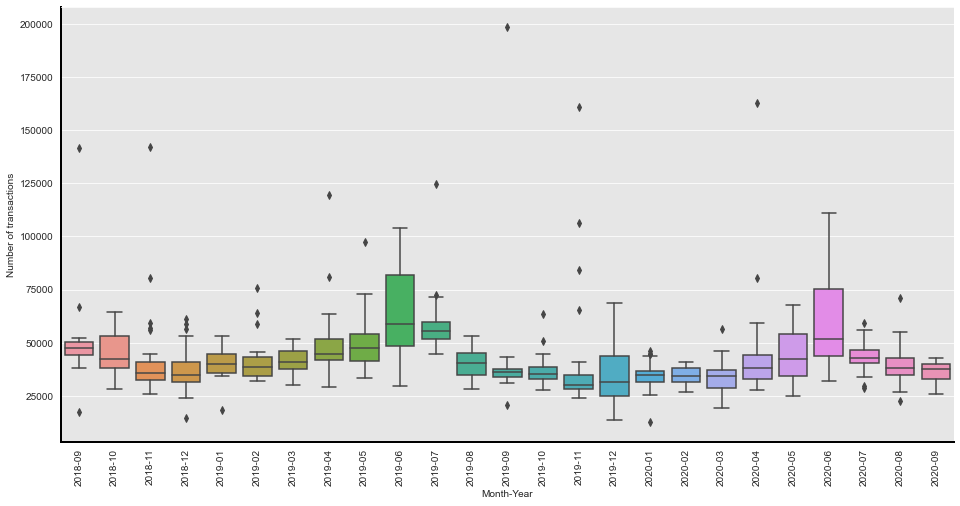

In [54]:
trans_gr_month = transactions.groupby('t_dat').size().rename("no_transactions")
trans_gr_month = trans_gr_month.reset_index()
trans_gr_month['month_year'] = trans_gr_month['t_dat'].dt.to_period('M')

fig, ax = plt.subplots(figsize=(16,8))
ax = sns.boxplot(x="month_year", y='no_transactions', data=trans_gr_month)
plt.xticks(rotation=90)
for loc in ['bottom', 'left']:
    ax.spines[loc].set_visible(True)
    ax.spines[loc].set_linewidth(2)
    ax.spines[loc].set_color('black')
ax.set_xlabel('Month-Year')
ax.set_ylabel('Number of transactions')
plt.show();

The bar chart of Number of Transactions below confirms that sales always have a peak during the changing seasons of spring and summer, as well as during the end-of-year holidays (Christmas and New Year's Eve). But during winter they and drop. We can also see that the number of transactions per day usuall lays in range about between 25 000 and 80 000 transactions.

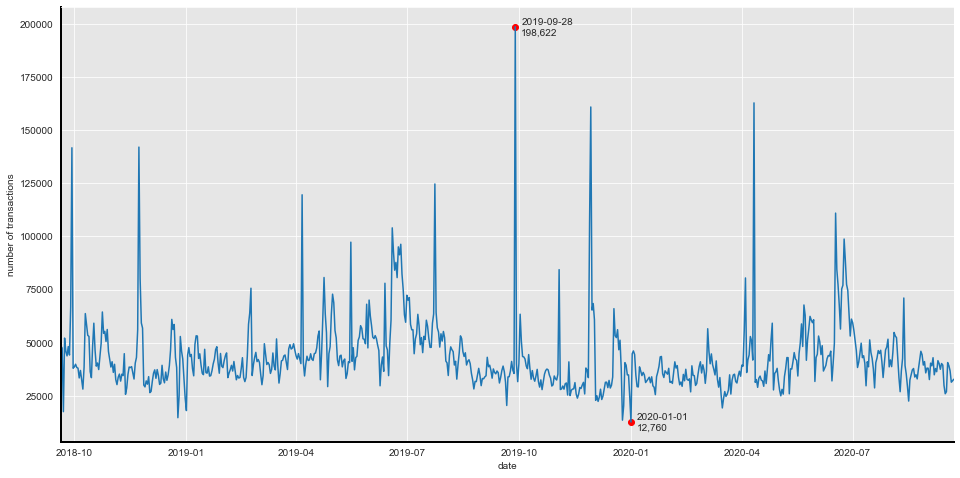

In [55]:
fig, ax = plt.subplots(figsize=(16,8))

sns.lineplot(data=t_per_day, x='t_dat',y='customer_id')

ax.set_xlabel('date')
ax.set_ylabel('number of transactions')

max_t = t_per_day['customer_id'].max()
max_t_date = t_per_day[t_per_day['customer_id']==max_t]['t_dat']
ax.scatter(max_t_date, max_t, c='red')
ax.text(max_t_date+pd.DateOffset(days=5), max_t-4000, '{}\n{:,d}'.format(max_t_date.iloc[0].date(), max_t))

min_t = t_per_day['customer_id'].min()
min_t_date = t_per_day[t_per_day['customer_id']==min_t]['t_dat']
ax.scatter(min_t_date, min_t, c='red')
ax.text(min_t_date+pd.DateOffset(days=5), min_t-4000, '{}\n{:,d}'.format(min_t_date.iloc[0].date(), min_t))
ax.set_xlim(transactions['t_dat'].min(),transactions['t_dat'].max())

for loc in ['bottom', 'left']:
    ax.spines[loc].set_visible(True)
    ax.spines[loc].set_linewidth(2)
    ax.spines[loc].set_color('black')

plt.show();



Now, let's see how many transactions, on average, customers do.

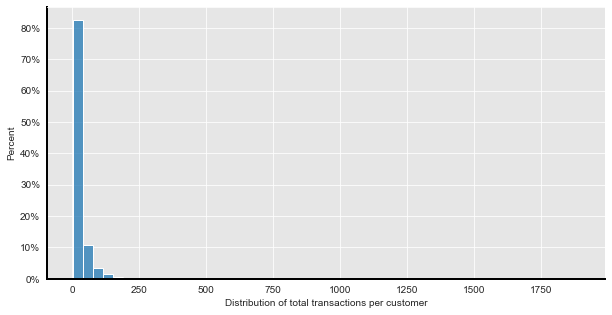

In [56]:
t_by_customer = transactions.groupby('customer_id', as_index=False).size()

fig, ax = plt.subplots(figsize=(10,5))
ax = sns.histplot(data=t_by_customer, x='size', bins=50, stat="percent")
ax.set_xlabel('Distribution of total transactions per customer')
for loc in ['bottom', 'left']:
    ax.spines[loc].set_visible(True)
    ax.spines[loc].set_linewidth(2)
    ax.spines[loc].set_color('black')
ax.yaxis.set_major_formatter(mtick.PercentFormatter())
plt.show();

Clearly there's a lot of outliers. Let's look at the distribution after cutting everything above 50 trasactions per customer.

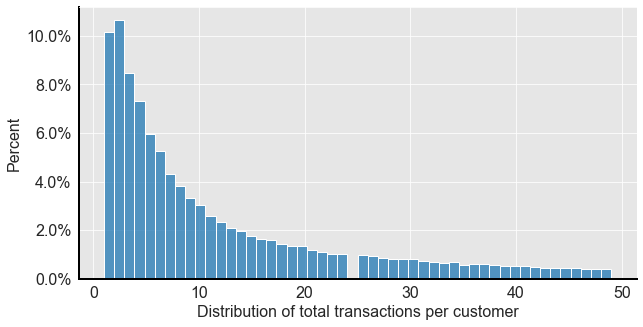

In [185]:
t_by_customer_50tr = t_by_customer[t_by_customer['size'] < 50]

fig, ax = plt.subplots(figsize=(10,5))
ax = sns.histplot(data=t_by_customer_50tr, x='size', bins=50, stat="percent")
ax.set_xlabel('Distribution of total transactions per customer')
for loc in ['bottom', 'left']:
    ax.spines[loc].set_visible(True)
    ax.spines[loc].set_linewidth(2)
    ax.spines[loc].set_color('black')
ax.yaxis.set_major_formatter(mtick.PercentFormatter())
plt.show();

The graph above shows us that most of customers bought only few items (from 1 to 10) during these 2 years. This information show us that customer loyalty is low. Probably the customers rather to shop at multiple retailers in search for the perfect fashion pieces, so they possibly shop also in other stores. We can say that customer attractiveness is high (as we can see in the number of sales), but customer loyalty is low.

Let's see now the popularity of sale channels.

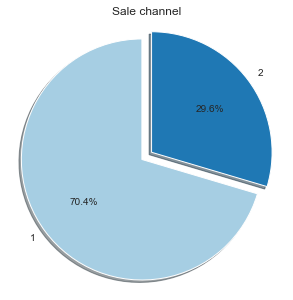

In [58]:
fig, ax = plt.subplots(figsize=(5,5))
explode = (0, 0.1)
colors = sns.color_palette('Paired')
ax.pie(transactions['sales_channel_id'].value_counts(), explode=explode, labels=['1','2'],
       autopct='%1.1f%%',shadow=True, startangle=90, colors=colors)
ax.axis('equal')
ax.set_title('Sale channel')
plt.show();

#### Cleaning:

We will not drop columns from this database, because we think all of them are relevant for our analysis, but we will increase a column to group the dates by month.

In [139]:
transactions['year_month'] = transactions['t_dat'].dt.to_period('M')

# 4. Combined databases EDA

### Merging Dataframes

Now we are going to merge the dataframes, to go further in our analysis.

In [69]:
df_new = pd.merge(transactions, customers, on='customer_id')

In [75]:
df = pd.merge(df_new, articles, on='article_id')

### General information about Sales

H&M is a very successfull company, with huge numbers of sales, as we can see in the chart below:

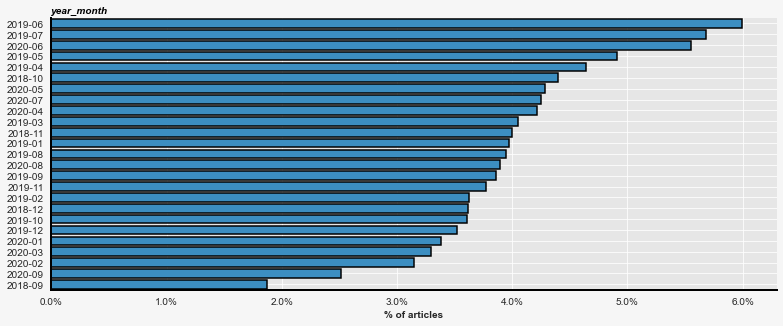

In [133]:
sns.set_style("darkgrid", {"axes.facecolor": ".9"})
plot_bar(df, 'year_month', pct=True)

Confirming what we said before, the months of summer are in top of the number of transactions. Curiously the transactions in 2019 were higher that in 2020, probably due to the Covid Crisis. Just in the month of June 2019, the total number of transactions were 1.906.202. In the same month of 2020, the transactions were 1.764.507.

In [141]:
t_month = df['year_month'].value_counts()
t_month

2019-06    1906202
2019-07    1807494
2020-06    1764507
2019-05    1560319
2019-04    1476454
2018-10    1397040
2020-05    1361815
2020-07    1351502
2020-04    1340882
2019-03    1286750
2018-11    1270619
2019-01    1263471
2019-08    1253530
2020-08    1237192
2019-09    1227178
2019-11    1198033
2019-02    1152412
2018-12    1148827
2019-10    1146772
2019-12    1118315
2020-01    1076354
2020-03    1047752
2020-02    1001859
2020-09     798269
2018-09     594776
Freq: M, Name: year_month, dtype: int64

Here we can see the garment group with higher number of transactions per section.

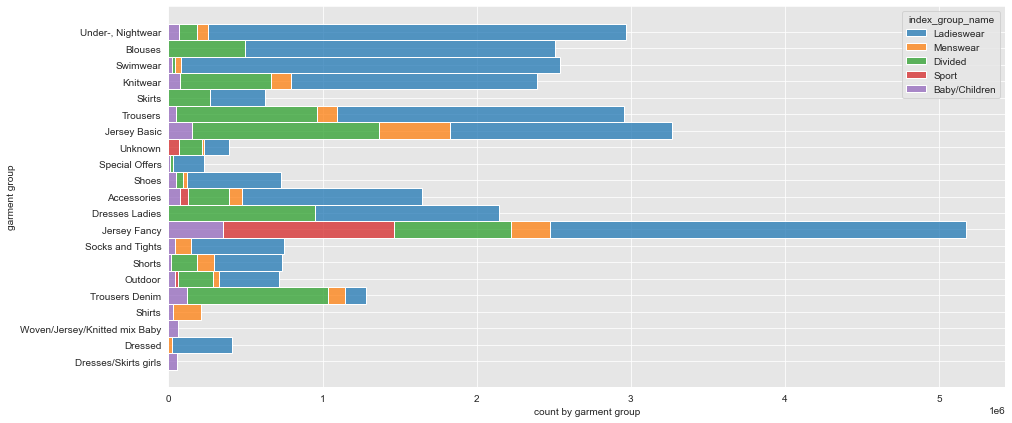

In [129]:
f, ax = plt.subplots(figsize=(15, 7))
ax = sns.histplot(data=df, y='garment_group_name', color='orange', hue='index_group_name', multiple="stack")
ax.set_xlabel('count by garment group')
ax.set_ylabel('garment group')
plt.show();

The sessions with the highest number of trades are not necessarily the same ones shown in the articles dataframe spreadsheet. There we saw that the articles for children were third in number of total articles. Here we see that the sales of Sport and Menswear articles are greater than the children's section.

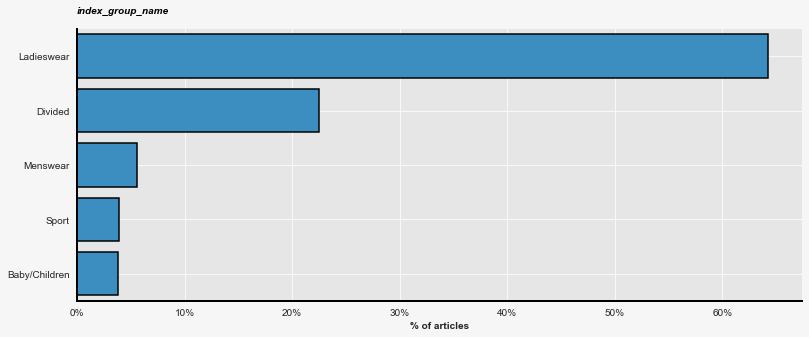

In [119]:
sns.set_style("darkgrid", {"axes.facecolor": ".9"})
plot_bar(df, 'index_group_name', pct=True)

In [107]:
group1 = df['index_group_name'].value_counts()
group1

Ladieswear       20415260
Divided           7138254
Menswear          1771053
Sport             1246408
Baby/Children     1217349
Name: index_group_name, dtype: int64

Below we can see a correlation between the number of units saled and the value spended on them. The majority of trades are from articles with lower prices, but there are some outliers. 

In [187]:
# Environment check
warnings.filterwarnings("ignore")
os.environ["WANDB_SILENT"] = "true"
CONFIG = {'competition': 'HandM', '_wandb_kernel': 'aot'}

# Custom colors
class clr:
    S = '\033[1m' + '\033[95m'
    E = '\033[0m'


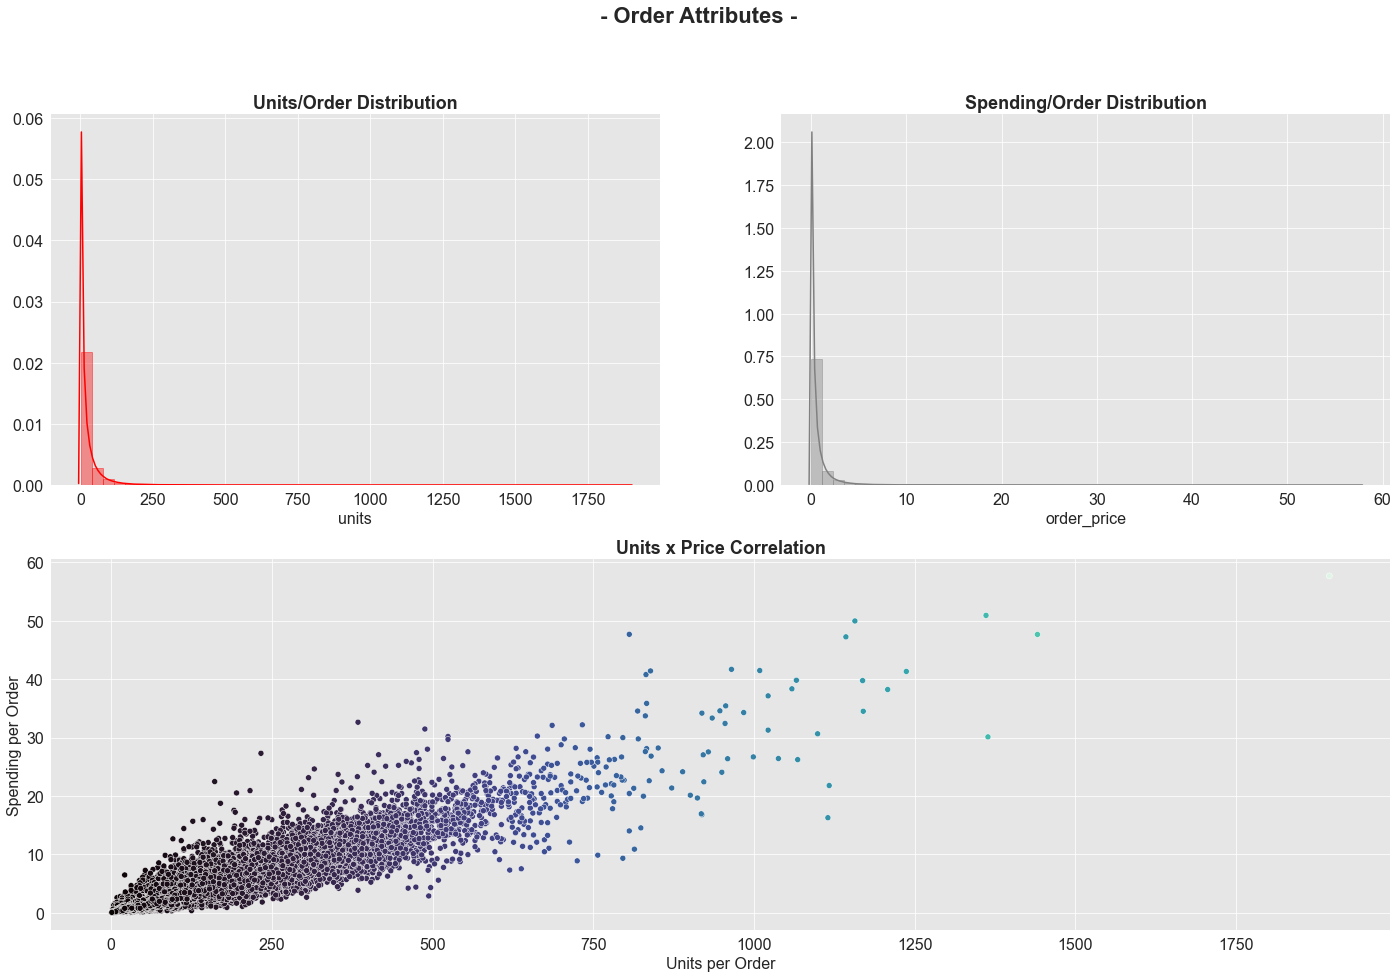

In [188]:
# Data
basket = df.groupby("customer_id").agg({'article_id':'count', 
                                                  'price': 'sum'}).reset_index()
basket.columns = ["customer_id", "units", "order_price"]


# Plot
plt.figure(figsize=(24, 15))
plt.suptitle('- Order Attributes -', size=22, weight="bold")

ax1 = plt.subplot(2,2,1)
ax2 = plt.subplot(2,2,2)
ax3 = plt.subplot(2,1,2)

sns.distplot(basket["units"], color='red', ax=ax1,
             hist_kws=dict(edgecolor='red'))
ax1.set_title("Units/Order Distribution", size=18, weight="bold")
ax1.set_ylabel("")

sns.distplot(basket["order_price"], color='grey', ax=ax2,
             hist_kws=dict(edgecolor='grey'))
ax2.set_title("Spending/Order Distribution", size=18, weight="bold")
ax2.set_ylabel("")

sns.scatterplot(data=basket, x="units", y="order_price", hue="units", palette="mako", 
                legend=None, ax=ax3)
ax3.set_title("Units x Price Correlation", size=18, weight="bold")
ax3.set_ylabel("Spending per Order")
ax3.set_xlabel("Units per Order")

sns.despine(left=True, bottom=True)
plt.subplots_adjust(left=None, bottom=None, right=None, top=None, wspace=None, hspace=None);

### Customers between age 35 - 46

In the graphic below we can confirm that not only the number of customers of age 35-36 are lower than the rest, but also the number of transactions made from this group are lower.

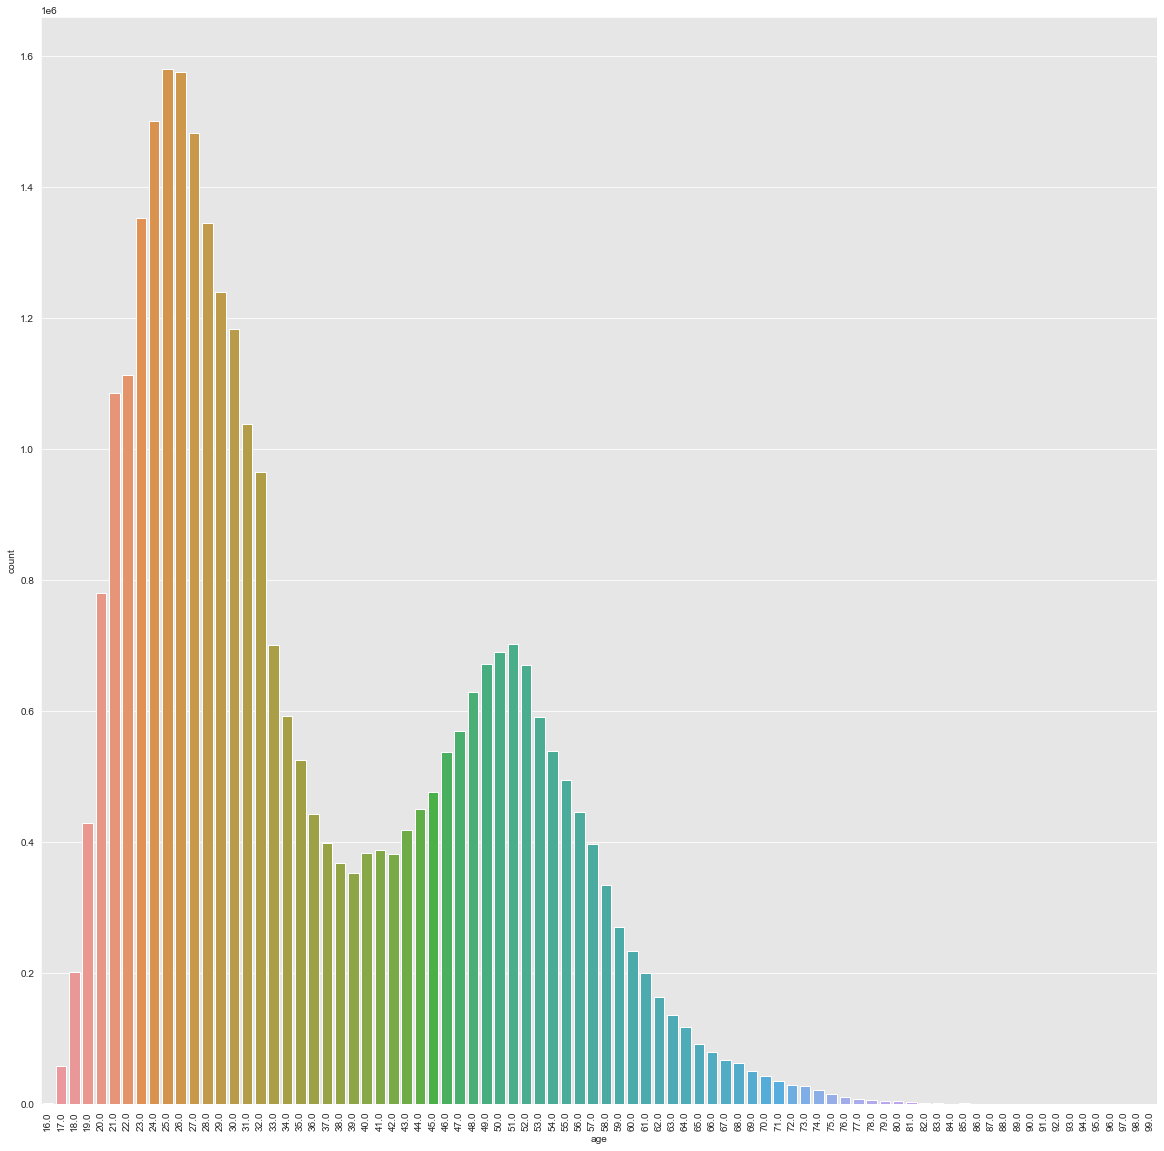

In [74]:
plt.figure(figsize=(20,20))
sns.countplot(x='age', data=df_new)
plt.xticks(rotation=90)
plt.show();

### Comparison between customers

Now we are going to divide the target by age and compare the behaviour, to see if there's any explainable reason for the less consumption of the adult target (between age 35 and 46). We divided 3 groups: Youngs (with age between 16 and 35), adults (age between 35 and 46) and older (age above 46).

In [89]:
filtro = ['price','colour_group_name','perceived_colour_value_name','index_name','section_name', 'index_group_name','sales_channel_id']

In [121]:
adults = df[filtro][(df['age']>=35) & (df['age']<=46)]

In [127]:
youngs = df[filtro][(df['age']>=16) & (df['age']<35)]

In [124]:
older = df[filtro][(df['age']>46)]

#### Sales Channel

We can see in the comparison below that the transactions per sales channel are almost the same between the 3 groups, only the older group buy a little bit more in sales channel number 2.

*Adults*

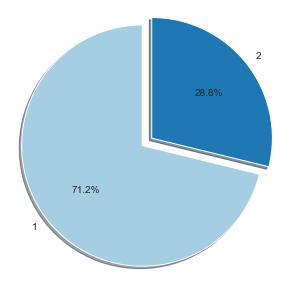

In [152]:
fig, ax = plt.subplots(figsize=(5,5))
explode = (0, 0.1)
colors = sns.color_palette('Paired')
ax.pie(adults['sales_channel_id'].value_counts(), explode=explode, labels=['1','2'],
       autopct='%1.1f%%',shadow=True, startangle=90, colors=colors)
ax.axis('equal')
plt.show();

*Youngs*

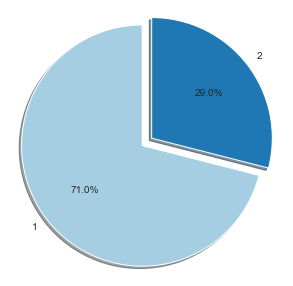

In [96]:
fig, ax = plt.subplots(figsize=(5,5))
explode = (0, 0.1)
colors = sns.color_palette('Paired')
ax.pie(youngs['sales_channel_id'].value_counts(), explode=explode, labels=['1','2'],
       autopct='%1.1f%%',shadow=True, startangle=90, colors=colors)
ax.axis('equal')
plt.show();

*Older*

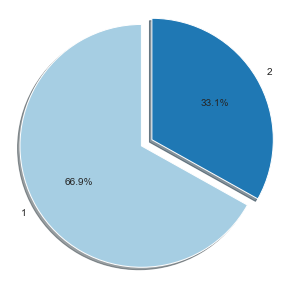

In [98]:
fig, ax = plt.subplots(figsize=(5,5))
explode = (0, 0.1)
colors = sns.color_palette('Paired')
ax.pie(older['sales_channel_id'].value_counts(), explode=explode, labels=['1','2'],
       autopct='%1.1f%%',shadow=True, startangle=90, colors=colors)
ax.axis('equal')
plt.show();

#### Colors prefered

There are no significant differences in color preference between the age groups. Basically, the preferred color of all groups is black, followed by white and dark blue.

*Adults*

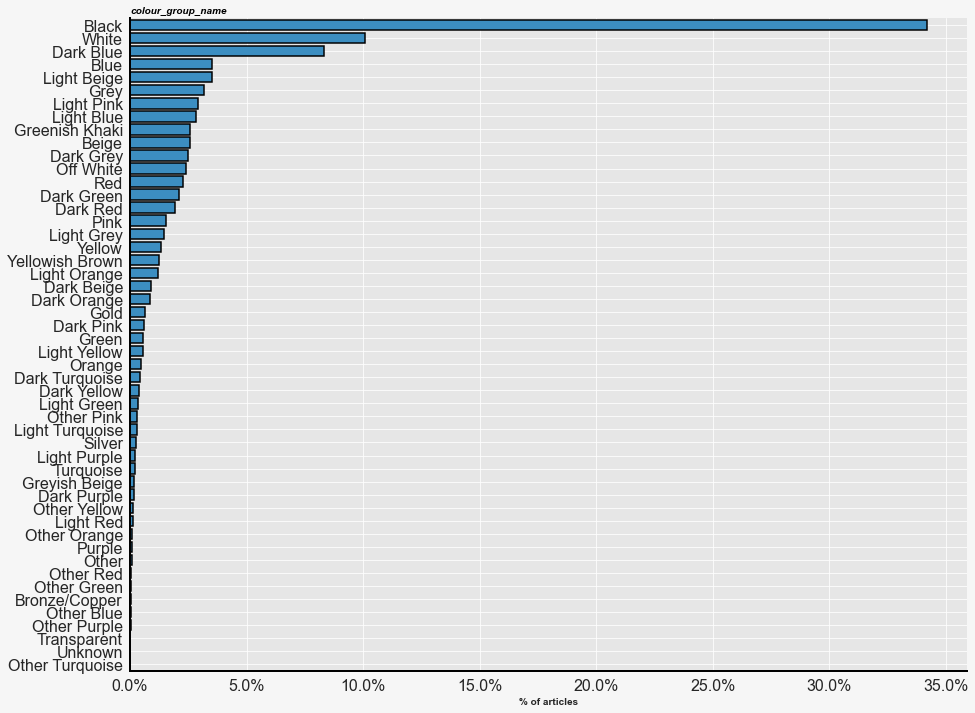

In [206]:
plot_bar(adults, 'colour_group_name', figsize=(15,12), pct=True)

*Youngs*

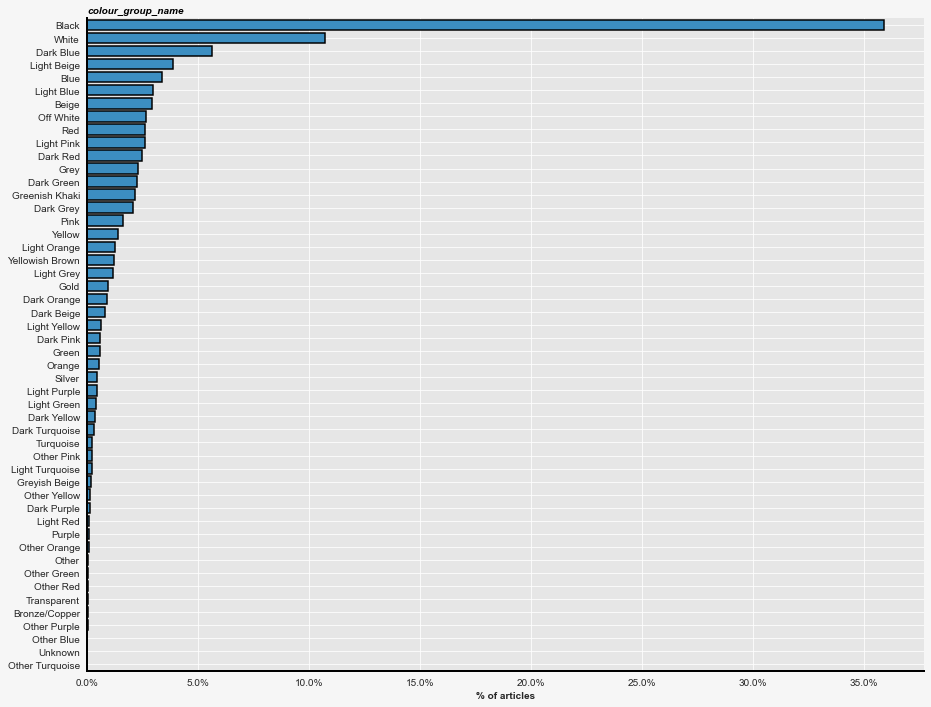

In [83]:
plot_bar(youngs, 'colour_group_name', figsize=(15,12), pct=True)

*Older*

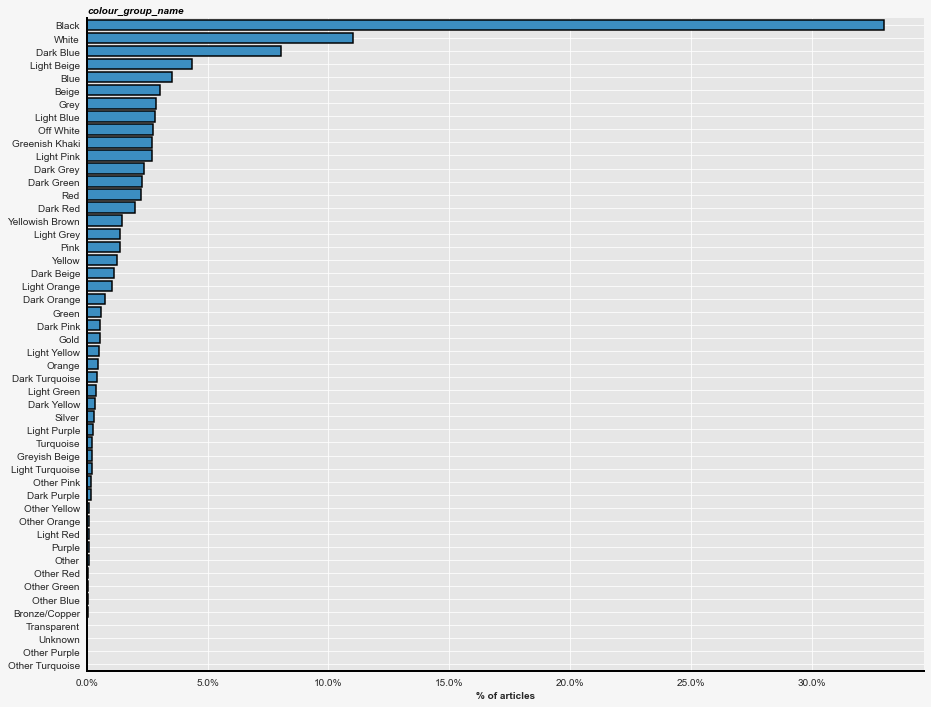

In [156]:
plot_bar(older, 'colour_group_name', figsize=(15,12), pct=True)

#### Sales per section

In the charts below is possible to see that also the sections where the 3 targets buy the most are very similar. It is interesting to note some small diferences, like in the chart of the younger group, where we can see that ladies accessories sells more than Menswear.

*Adults*

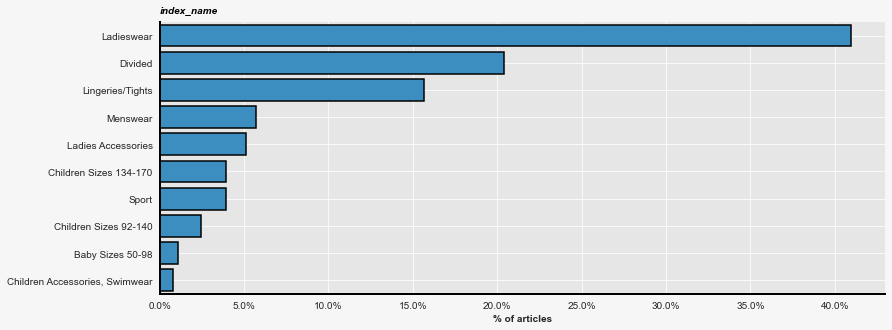

In [79]:
sns.set_style("darkgrid", {"axes.facecolor": ".9"})
plot_bar(adults, 'index_name', pct=True)

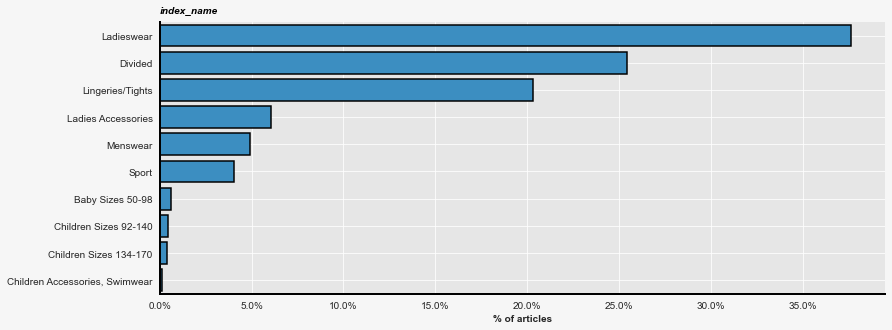

In [84]:
sns.set_style("darkgrid", {"axes.facecolor": ".9"})
plot_bar(youngs, 'index_name', pct=True)

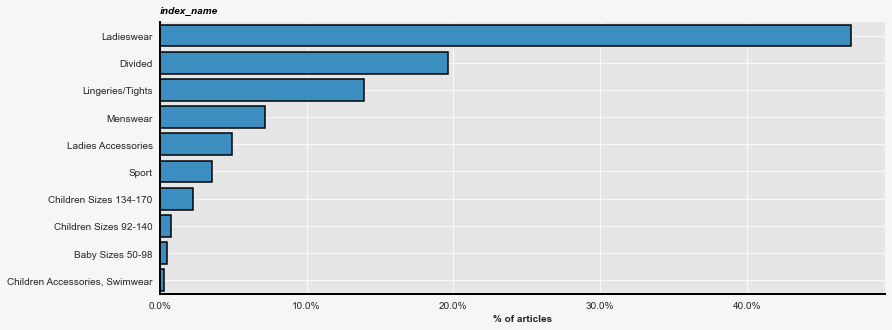

In [157]:
sns.set_style("darkgrid", {"axes.facecolor": ".9"})
plot_bar(older, 'index_name', pct=True)

#### Sales per section group

In the sales per section we can find also a small diference between the groups, noticing that in the chart reffered to the Adult group the sales of Baby/Children products are in the third position. We can also notice that the Young group is the one who buy Children/Baby products the least, being this session in the last position.

*Adults*

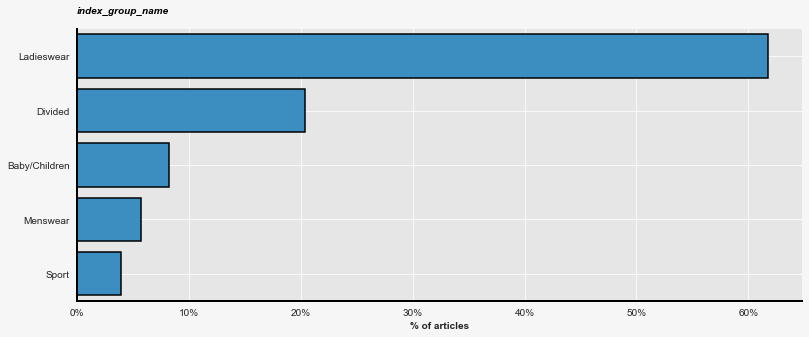

In [80]:
sns.set_style("darkgrid", {"axes.facecolor": ".9"})
plot_bar(adults, 'index_group_name', pct=True)

*Youngs*

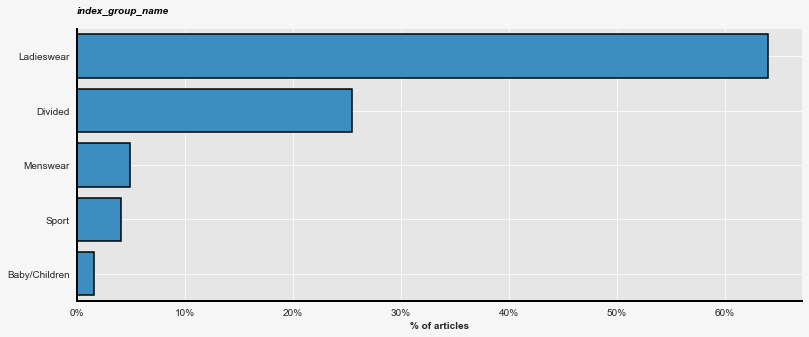

In [85]:
sns.set_style("darkgrid", {"axes.facecolor": ".9"})
plot_bar(youngs, 'index_group_name', pct=True)

*Older*

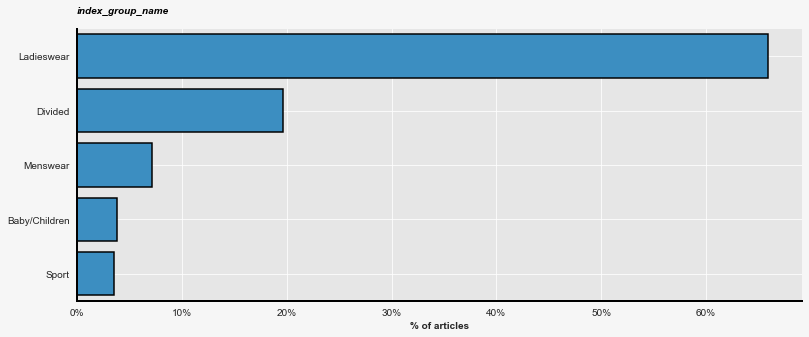

In [158]:
sns.set_style("darkgrid", {"axes.facecolor": ".9"})
plot_bar(older, 'index_group_name', pct=True)

#### Prices paid

With regard to the amounts spent on their purchases, there is also little difference between the groups. The 3 groups purchase more cheap products, but we can see that the older group pay a little bit more in the sales.

*Adults*

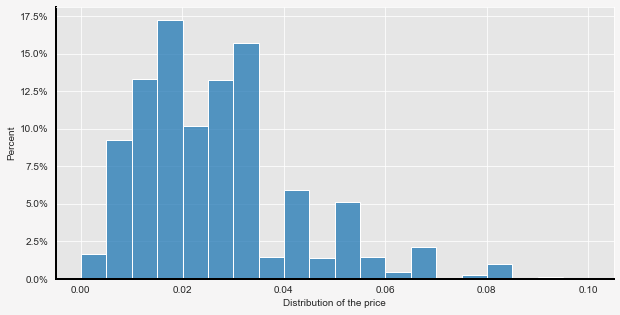

In [153]:
fig, ax = plt.subplots(figsize=(10,5), facecolor='#f6f5f5')
data = adults[adults['price']<0.1]
ax = sns.histplot(data=data, x='price', bins=20, stat="percent")
ax.set_xlabel('Distribution of the price')
for loc in ['bottom', 'left']:
    ax.spines[loc].set_visible(True)
    ax.spines[loc].set_linewidth(2)
    ax.spines[loc].set_color('black')
ax.yaxis.set_major_formatter(mtick.PercentFormatter())
plt.show();

*Youngs*

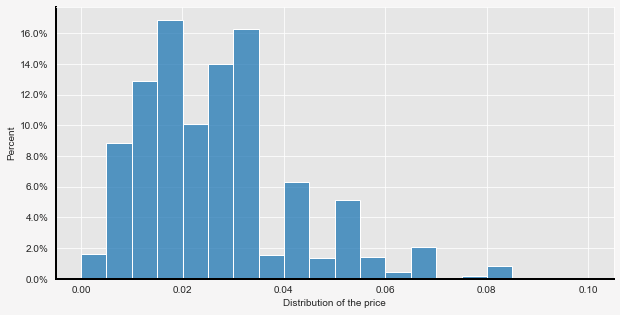

In [154]:
fig, ax = plt.subplots(figsize=(10,5), facecolor='#f6f5f5')
data = youngs[youngs['price']<0.1]
ax = sns.histplot(data=data, x='price', bins=20, stat="percent")
ax.set_xlabel('Distribution of the price')
for loc in ['bottom', 'left']:
    ax.spines[loc].set_visible(True)
    ax.spines[loc].set_linewidth(2)
    ax.spines[loc].set_color('black')
ax.yaxis.set_major_formatter(mtick.PercentFormatter())
plt.show();

*Older*

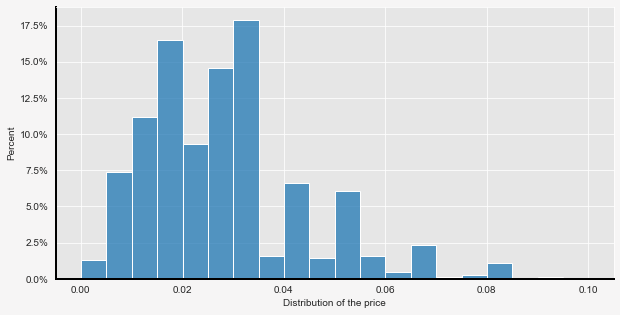

In [155]:
fig, ax = plt.subplots(figsize=(10,5), facecolor='#f6f5f5')
data = older[older['price']<0.1]
ax = sns.histplot(data=data, x='price', bins=20, stat="percent")
ax.set_xlabel('Distribution of the price')
for loc in ['bottom', 'left']:
    ax.spines[loc].set_visible(True)
    ax.spines[loc].set_linewidth(2)
    ax.spines[loc].set_color('black')
ax.yaxis.set_major_formatter(mtick.PercentFormatter())
plt.show();

### Conclusion

#### Final assumptions

It is clear that the brand focuses its communication to target teenagers up to the age of 30 (an age around 13 - 35). So H&M has "sub-brands" like the Divided session, for example, aimed at the younger community - we would say teens and young adults.

The Ladieswear/Menswear session is more focused on a "Modern Classics" style, for business women and men in their 40s or older usually. There is no specific sub-brand for this audience, the daily wear is suitable for all, as well as comfortable clothes with good fabric, but there's no differentiated style session such as they have for the customers of the late 20's and up.


Another interesting point we noticed in this study is the high amount of customers from the "older" group who transact on H&M's platform. This is in line with the latest studies on the consumption behavior of the over-50s, who increasingly prefer to buy things online.

#### Sugestions

We consider that would be a great opportunity for H&M to create new collections targeting the 35-46 public and thereby invest more in online communication with this group, encouraging them to receive more of their newsletters, doing retargeting marketing focused on this group, in order to bring them more to their platform and make them more active in their transactions. After all, it is an economically active group that can help the company to recover sales after the downturn that occurred with the covid crisis.